<a href="https://colab.research.google.com/github/sandeep0944/mini_project_3/blob/main/Mini_Project_3_With_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1><center><font size=12>Introduction to LLMs and GenAI</center></font></h1>
<h1><center><font size=8>Mini Project 3: Attention Mechanism and Transformers</center></h1>

#  **Emergence of Embeddings from BOW to Self Attention:**
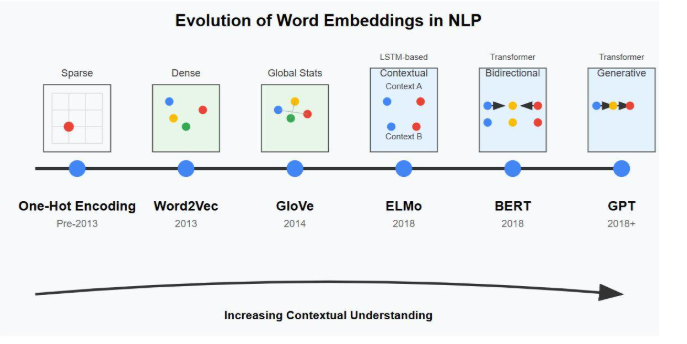

# **Visual Roadmap**
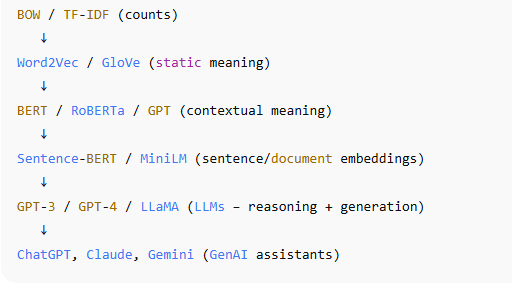

# **Quick Recap**

* Project 1 (BOW/TF-IDF + ML models): Words treated as independent counts, no meaning.

* Project 2 (Word2Vec, GloVe): Words as static vectors → captures similarity, but same word = same vector everywhere.

**Problem still unsolved: Meaning of a word changes with context.**

**==========================================================**



# **Evolution of Embeddings**
1️⃣ Word Embeddings (Word2Vec, GloVe, FastText)

* Each word is mapped to a fixed vector (e.g., 300 dimensions).

* Words with similar context appear close in vector space.

  Example: king – man + woman ≈ queen.

* Limitation:

  * They are static → the word has only one meaning.

    Example: “bank” (riverbank vs. financial bank) gets the same vector.

  * No understanding of sentence-level meaning.

2️⃣ Contextual Word Embeddings (BERT -Bidirectional Encoder Representations from Transformers, RoBERTa, GPT)

* Instead of static vectors, context matters.

 “bank” in “money at the bank” vs. “sat by the river bank” → different embeddings.

* Each token (word/subword) has an embedding that changes depending on surrounding words.

* Limitation:

  * Great for NLP tasks (QA, classification), but not efficient for sentence-to-sentence similarity.

  * To compare two sentences, BERT must process them together → very slow for large datasets.

3️⃣ Sentence Embeddings (SBERT = Sentence-Transformers)

* SBERT builds on BERT, but fine-tunes it with Siamese / Triplet networks.

  Output: a single fixed-length vector for the whole sentence/document.

* Now, we can:

  * Compare sentences with cosine similarity (fast).

  * Cluster thousands of sentences/documents easily.

## **Visual Summary**
| Level                          | Example Tech          | What It Represents               | Limitations                                             |
| ------------------------------ | --------------------- | -------------------------------- | ------------------------------------------------------- |
| **Word Embeddings**            | Word2Vec, GloVe       | Fixed vector for each word       | No context, can’t represent full sentences              |
| **Contextual Word Embeddings** | BERT, RoBERTa         | Context-sensitive word vectors   | Expensive to compare sentences, not sentence-level      |
| **Sentence Embeddings**        | SBERT (MiniLM, MPNet) | One vector per sentence/document | ✅ Fast, ✅ Contextual, ✅ Good for clustering & retrieval |


##  **Which real-world tasks each technique is best at:**

* TF-IDF: Spam detection, keyword extraction

* Word2Vec/GloVe: Synonym finding, word similarity

* BERT: Sentiment analysis, entity recognition, Q&A

* Sentence-BERT/MiniLM: Document classification, semantic search

* GPT/LLMs: Summarization, chatbot, essay writing, code generation

**=========================================================**

# **Transformers as the Foundation**

The Transformer architecture (Vaswani et al., 2017 — **“Attention Is All You Need”**) is the base building block.

It introduced self-attention, which is very powerful for capturing relationships in sequences (words, tokens, etc.).

## **What happened after Transformers**

### Since then, researchers have been:

* Adapting the Transformer for different problems.

* Mixing in older techniques (like Siamese networks, triplet loss, contrastive learning, distillation).

* Fine-tuning them on different datasets (news, dialogues, code, multimodal).

### It looks a lot like “hit & trial,” but it’s actually a structured exploration of design choices:

* Want word embeddings with context? → Use BERT.

* Need faster, smaller models? → DistilBERT, MiniLM.

* Want sentence-level similarity? → SBERT (uses Siamese/Triplet on top of BERT).

* Want long document handling? → Longformer, BigBird.

* Want images + text together? → CLIP.

* Want generation? → GPT family, T5.

### **Why it feels like “Hit & Trial”**

There isn't a single recipe that works for all NLP problems.

Researchers try different training objectives, architectures, and tricks → then benchmark them.

Successful ones become new standards (like BERT, GPT, SBERT, CLIP).

Others fade away if they don’t generalize well.

## **Analogy**

* Think of the Transformer as “the engine”.

* Some people build cars (BERT, GPT for text).

* Others build bikes (DistilBERT: lightweight).

* Some make trucks (Longformer: long documents).

* Others make flying cars (CLIP: vision + text).


***Transformer is the base. Everything else is creative variations + smart training tricks to solve specific tasks.***

**===========================================================**

# **Problem Statement**

## Business Context

In today’s fast-paced media industry, swiftly categorizing and curating content is crucial. With an overwhelming flow of news across diverse topics, efficient systems are needed to deliver the right content to the right audience and maintain engagement.

Key Challenges:

* Information Overload: The vast number of articles makes manual categorization impractical.

* Timeliness: Delays in classification can lead to outdated or misplaced content.

## Problem Definition

E-news Express, a news aggregation startup, struggles with efficiently categorizing diverse articles across sports, entertainment, politics, and more. Manual classification is time-consuming, error-prone, and risks delays or reputational damage. To address this, the startup aims to adopt machine learning to automate categorization.

As a data scientist, the task is to build an unsupervised model that groups articles by content and validate results against human labels, ensuring faster, accurate, and personalized news delivery.

## Data Dictionary

- **Text**: The main body of the news article

## Installing and importing the necessary libraries

In [ ]:
# installing the sentence-transformers library
!pip install -U sentence-transformers -q

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

# importing the PyTorch Deep Learning library
import torch

# to import the model
from sentence_transformers import SentenceTransformer

# to cluster the data
from sklearn.cluster import KMeans

# to compute metrics
from sklearn.metrics import classification_report

# to avoid displaying unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reviews = pd.read_csv("/content/drive/MyDrive/Ashwani/news_articles.csv")

In [ ]:
# creating a copy of the dataset
data = reviews.copy()

## Data Overview

### Checking the first five rows of the data

In [ ]:
# Print first 5 rows of data
data.head()

,Text
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n"
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots

In [ ]:
# checking a news article
data.loc[3, 'Text']

'Observers to monitor UK election\n \n Ministers will invite international observers to check the forthcoming UK general election is fairly run.\n \n The move comes amid claims the poll could be marred by electoral fraud. A report by two MPs committees called on Thursday for urgent changes to the electoral registration system to combat vote rigging and boost turnout. But in a written response to Labour MP Gordon Prentice, the government said it would normally invite observers to any UK election.\n \n Junior constitutional affairs minister Christopher Leslie said: "I fully expect us to repeat our previous practice of doing so once the date for the next general election is announced." The government has looked at ways of boosting voter turnout, which fell to 59% in the last general election in 2001.\n \n But trial all-postal ballots in four English regions last summer were hit by delays and some fraud allegations. Liberal Democrat peer Lord Greaves called last week for international obse

### Checking the last five rows of the data

In [ ]:
# Print last 5 rows of data
data.tail()

,Text
2220,"India opens skies to competition\n \n India will allow domestic commercial airlines to fly long haul international routes, a move it hopes will stoke competition and drive down prices.\n \n However, only state controlled carriers will be able to fly the lucrative Gulf routes, to countries such as Kuwait and Saudi Arabia, for at least three years. Jet Airways and Air Sahara are the two companies that will benefit initially. India is looking to develop its airline industry as booming economic growth drives demand for travel.\n \n Monica Chadha, BBC Delhi reporter, said air travel in India had increased by almost 20% from the previous year and was expected to rise even further. Infrastructure development is lagging demand, however, and will have to improve. ""Most international airports in the country are shabby and ill-equipped to handle heavy air traffic,"" Ms Chada said, adding that while the Civil Aviation minister has promised to modernise and privatise airports little progress has been made. Steps have been take to move things forward and the government recently changed legislation that limited foreign investment in domestic airlines. It raised the maximum stake holding allowed to 49% from 40%. Local press, meanwhile, have reported that the US and India will start negotiations about adding more routes in January. Jet Airways is India's premier private domestic carrier; Air Sahara is ranked third in the category.\n"
2221,"Yukos bankruptcy 'not US matter'\n \n Russian authorities do not have to abide by any US court decisions taken with regard to troubled oil giant Yukos, a Houston court has been told.\n \n Legal expert William Butler said there was no treaty between the US and Russia to recognise the other's legal rulings. That meant Moscow would not have to adhere to US rulings in the Yukos case. Yukos says a US court was entitled to declare it bankrupt before its Yugansk unit was sold, since it has a US subsidiary and local bank accounts.\n \n Yukos made its surprise Chapter 11 bankruptcy filing in Houston in December in an unsuccessful attempt to halt the auction of Yugansk, its main oil producing unit, by Russian authorities. Yugansk was sold to help pay off a $27.5bn (Â£14.5bn) back tax bill. It was bought for $9.4bn by a previously unknown group, which was in turn bought by state-controlled oil company Rosneft. The US court's jurisdiction has been challenged by Deutsche Bank and Gazpromneft, a former unit of Russian gas monopoly Gazprom which is due to merge with Rosneft. Deutsche Bank maintains the case has no place in a US court because Yukos has no assets in the US, apart from two bank accounts and a house in Houston owned by its chief finance officer Bruce Misamore. Deutsche Bank is involved in the case because it is itself being sued by Yukos. It had agreed to loan Gazpromneft the money to bid for Yugansk. US bankruptcy judge Letitia Clark, who issued an injunction in December to try and prevent the Yugansk sale, has said she will rule ""pretty promptly, however I do not anticipate ruling on it before next Tuesday"".\n \n Yukos has claimed it sought help in the US because other forums - Russian courts and the European Court of Human Rights - were either unfriendly or offered less protection. It has claimed that Russia imposed the huge tax bill and forced the sale of Yugansk as part of a campaign to destroy Yukos and its former owner Mihkail Khodorkovsky, who is facing a 10-year prison term in Russia for fraud and tax evasion. Yukos' parent company, the Gibraltar-based Menatep Group, is suing Russia in Europe for $28.3bn in financial damages. The company is also seeking $20bn in a separate US lawsuit against Rosneft and Gazprom for their role in the sale of Yugansk.\n"
2222,"Survey confirms property slowdown\n \n Government figures have confirmed a widely reported slowdown of the UK's housing market in late 2004.\n \n House prices were 11.8% higher on the year in the last quarter of 2004, down from 16.3

### Checking the shape of the dataset

In [ ]:
# print shape of data
data.shape

(2225, 1)

* The data comprises of ~2.2k news articles

### Checking for missing values

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Text,0


- There are no mising values in the data

### Checking for duplicate values

In [ ]:
# Check for duplicate values
data.duplicated().sum()

np.int64(98)

- We'll drop the duplicate values in the data.

In [ ]:
data = data.drop_duplicates()

# resetting the dataframe index
data.reset_index(drop=True, inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(2127, 1)

- There are no duplicate values in the data now.

## Model Building

### What is required?
* We don't want to compare words → we want to categorize full news articles.
* SBERT gives us compact, meaningful vectors for each article.

* Then we can use clustering / classification to group them into Politics, Business, Entertainment, Technology, Sports.

### What are Sentence-Transformers (SBERT)?

* Sentence-Transformers (SBERT) is an open-source Python framework (built on PyTorch & Hugging Face Transformers) that provides models to generate dense vector representations (embeddings) for sentences, paragraphs, or documents.

* These embeddings capture semantic meaning — so sentences with similar meaning are close together in vector space.

### **Defining the model**

#### We'll be using the **all-MiniLM-L6-v2** model here.
This model is from Sentence-Transformers (by Hugging Face + Microsoft)

* The all-MiniLM-L6-v2 model is an all-round (all) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

* It is a language model (LM) that has 6 transformer encoder layers (L6) and is a smaller model (Mini) trained to mimic the performance of a larger model (BERT).

* Potential use-cases include text classification, sentiment analysis, and semantic search.


**Key reasons it fits our use case well:**

* Compact & Lightweight
Only 22M parameters, embedding size 384.

* Super fast to train/infer, even on CPU or a free Colab GPU.
Ideal for a dataset of ~2K articles — no overkill.

* High-Quality Semantic Embeddings
Trained on 1 billion+ sentence pairs.

* Optimized for semantic similarity & clustering, which is exactly what we need for news categorization (unsupervised or semi-supervised).

* Balanced Accuracy vs. Speed
Benchmarks show 80-85% performance of much larger models (like MPNet or RoBERTa-large) at a fraction of the compute cost.

* Perfect when our dataset isn't huge but still needs good accuracy.

* Freely Downloadable & Offline Usable
Unlike API-only models (e.g., OpenAI's text-embedding-ada-002), we can fully download and run it in Colab without internet after setup.

* Zero cost + no data privacy concerns.

### Other comparable models;

| Model                                 | Dimensionality | Size          | Speed (Colab)                | Accuracy (Semantic Tasks)                      | Cost / Availability               | Best Use Case                                   |
| ------------------------------------- | -------------- | ------------- | ---------------------------- | ---------------------------------------------- | --------------------------------- | ----------------------------------------------- |
| **all-MiniLM-L6-v2** (SBERT)          | 384            | \~22M params  | 🚀 Very Fast (CPU/GPU)       | ⭐⭐☆ (Good, \~80% of SOTA)                      | Free, Downloadable (Hugging Face) | Small datasets, clustering, categorization      |
| **all-mpnet-base-v2** (SBERT)         | 768            | \~109M params | ⚡ Medium (needs GPU)         | ⭐⭐⭐ (High, \~90% of SOTA)                      | Free, Downloadable (Hugging Face) | When accuracy matters more than speed           |
| **all-distilroberta-v1** (SBERT)      | 768            | \~82M params  | ⚡ Medium                     | ⭐⭐☆ (Good, better than MiniLM but below MPNet) | Free, Downloadable                | Balanced speed & performance                    |
| **multi-qa-MiniLM-L6-cos-v1** (SBERT) | 384            | \~22M params  | 🚀 Very Fast                 | ⭐⭐☆ (Good, optimized for QA/Retrieval)         | Free, Downloadable                | Search, RAG-style tasks                         |
| **OpenAI text-embedding-3-small**     | 1536           | API-only      | ⚡ Fast (API latency \~300ms) | ⭐⭐⭐⭐ (SOTA on benchmarks)                      | Low cost (\$0.02 / 1M tokens)     | Industry-grade semantic search & classification |
| **Cohere embed-multilingual-v3**      | 1024           | API-only      | ⚡ Fast (API latency)         | ⭐⭐⭐⭐ (Strong multilingual)                     | Free tier (5M tokens/mo)          | Multilingual datasets, cross-lingual tasks      |
| **Google Gecko (Vertex AI)**          | 768–1024       | API-only      | ⚡ Fast                       | ⭐⭐⭐⭐ (Google quality, multilingual)            | Paid (GCP pricing)                | Enterprise / multilingual RAG                   |


**=====================================**

* hf_xet is a helper package for enhancing file transfers with the Hugging Face Hub.
It integrates Rust-based code for efficient, chunk-based deduplication,
and caching when uploading or downloading large files

In [ ]:
!pip install hf_xet

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### **Encoding the dataset**

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
embedding_matrix = model.encode(data['Text'], show_progress_bar=True, device=device)

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(2127, 384)

**Embedding dimensions for different models**
| **Model**                              | **Embedding Dimension** |
| -------------------------------------- | ----------------------- |
| `all-MiniLM-L6-v2`                     | 384                     |
| `all-mpnet-base-v2`                    | 768                     |
| `paraphrase-MiniLM-L12-v2`             | 384                     |
| `distilbert-base-nli-stsb-mean-tokens` | 768                     |


- Each news article has been converted to a 384-dimensional vector

In [ ]:
# printing the embedding vector of the first review in the dataset
embedding_matrix

array([[ 0.01447943, -0.04389052,  0.04060483, ..., -0.10616202,
        -0.07350338,  0.04177548],
       [-0.09047544, -0.05614533, -0.04221483, ..., -0.07412107,
        -0.10995261, -0.00235795],
       [-0.02446528,  0.06942253, -0.03976302, ...,  0.04179753,
        -0.02366888,  0.0308788 ],
       ...,
       [ 0.05059445, -0.0680866 ,  0.06539164, ..., -0.10383671,
        -0.06437869,  0.06936338],
       [ 0.04576187, -0.0233809 , -0.02380372, ..., -0.13956049,
        -0.06866353, -0.00268309],
       [-0.0039066 , -0.10746797,  0.01811688, ..., -0.08941356,
         0.00861686,  0.04516932]], dtype=float32)

**Note**: We have not trained or fine-tuned the model. We have used the pre-trained model to encode the dataset.

### **Semantic Search**

In [ ]:
# defining a function to compute the cosine similarity between two embedding vectors
def cosine_score(text1,text2):
    # encoding the text
    embeddings1 = model.encode(text1)
    embeddings2 = model.encode(text2)

    # calculating the L2 norm of the embedding vector
    norm1 = np.linalg.norm(embeddings1)
    norm2 = np.linalg.norm(embeddings2)

    # computing the cosine similarity
    cosine_similarity_score = ((np.dot(embeddings1,embeddings2))/(norm1*norm2))

    return cosine_similarity_score

In [ ]:
a= "i love apple"
b= "apple is a fruit"
c= "i like this table"
print(cosine_score(a,b))
print(cosine_score(b,c))
print(cosine_score(a,c))


0.55750245
0.07198224
0.27396196


In [ ]:
# We can also use prebuilt method to calculate similarity score

a= "i love apple"
b= "apple is a fruit"
c= "i like this table"

from sentence_transformers import util

embeddings1 = model.encode(a)
embeddings2 = model.encode(b)
embeddings3 = model.encode(c)

print(util.cos_sim(embeddings1, embeddings2))
print(util.cos_sim(embeddings2, embeddings3))
print(util.cos_sim(embeddings1, embeddings3))

tensor([[0.5575]])
tensor([[0.0720]])
tensor([[0.2740]])


**Now, let's search for similar reviews in our dataset.**

In [ ]:
# defining a function to find the top k similar sentences for a given query
def top_k_similar_sentences(embedding_matrix, query_text, k):
    # encoding the query text
    query_embedding = model.encode(query_text)

    # calculating the cosine similarity between the query vector and all other encoded vectors of our dataset
    score_vector = np.dot(embedding_matrix,query_embedding)

    # sorting the scores in descending order and choosing the first k
    top_k_indices = np.argsort(score_vector)[::-1][:k]

    # returning the corresponding reviews
    return data.loc[list(top_k_indices), 'Text']

In [ ]:
# defining the query text
query_text = "Budget for elections"

# displaying the top 2 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 2)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

'Debate needed' on donations cap
 
 A cap on donations to political parties should not be introduced yet, the elections watchdog has said.
 
 Fears that big donors can buy political favours have sparked calls for a limit. In a new report, the Electoral Commission says it is worth debating a Â£10,000 cap for the future but now is not the right time to introduce it. It also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.
 
 There were almost Â£68m in reported donations to political parties in 2001, 2002 and 2003, with nearly Â£12m of them from individual gifts worth more than Â£1m. The rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. The commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work. "While we are 

In [ ]:
# defining the query text
query_text = "High imports and exports"

# displaying the top 2 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 2)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

US trade gap ballooned in October
 
 The US trade deficit widened by more than expected in October, hitting record levels after higher oil prices raised import costs, figures have shown
 
 The trade shortfall was $55.5bn (Â£29bn), up 9% from September, the Commerce Department said. That pushed the 10 month deficit to $500.5bn. Imports rose by 3.4%, while exports increased by only 0.6%. A weaker dollar also increased the cost of imports, though this should help drive export demand in coming months. "Things are getting worse, but that's to be expected," said David Wyss of Standard & Poor's in New York. "The first thing is that when the dollar goes down, it increases the price of imports. "We are seeing improved export orders. Things seem to be going in the right direction."
 
 Despite this optimism, significant concerns remain as to how the US will fund its trade and budget deficits should they continue to widen. Another problem highlighted by analysts was the growing trade gap with Chin

### **Categorization**

**We'll use K-Means Clustering to categorize the data.**

In [ ]:
meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 2 	Average Distortion: 1795.3091547656288
Number of Clusters: 3 	Average Distortion: 1737.2980512996512
Number of Clusters: 4 	Average Distortion: 1666.6703324854416
Number of Clusters: 5 	Average Distortion: 1621.4824265261927
Number of Clusters: 6 	Average Distortion: 1591.5027838340886
Number of Clusters: 7 	Average Distortion: 1577.1054570447486
Number of Clusters: 8 	Average Distortion: 1571.6844119258612
Number of Clusters: 9 	Average Distortion: 1559.9433585891018
Number of Clusters: 10 	Average Distortion: 1534.3992694291262


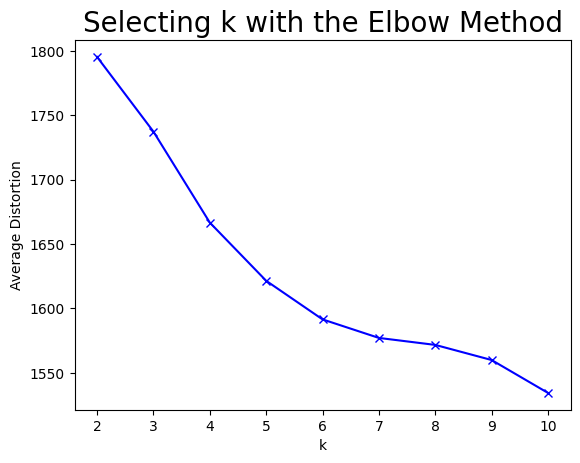

In [ ]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

- The appropriate value of k from the Elbow curve seems to 5.

**Let's check the silhouette scores.**

In [ ]:
sil_score = []
cluster_list = range(2, 11)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.04681149870157242)
For n_clusters = 3, the silhouette score is 0.04964282363653183)
For n_clusters = 4, the silhouette score is 0.060650650411844254)
For n_clusters = 5, the silhouette score is 0.06735046207904816)
For n_clusters = 6, the silhouette score is 0.06096599996089935)
For n_clusters = 7, the silhouette score is 0.05802199989557266)
For n_clusters = 8, the silhouette score is 0.053445685654878616)
For n_clusters = 9, the silhouette score is 0.05067499727010727)
For n_clusters = 10, the silhouette score is 0.04589764401316643)


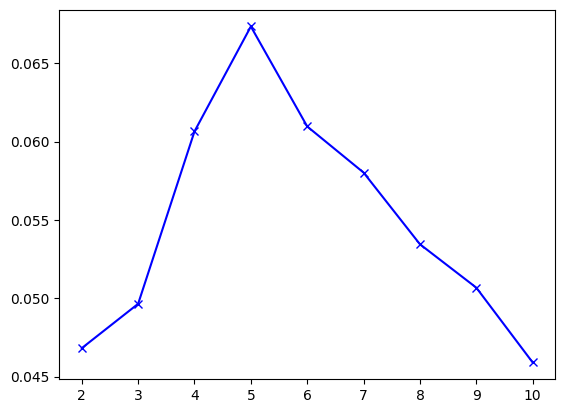

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

- The silhouette coefficient for 5 clusters is the highest.
- So, we will proceed with 5 clusters.

In [ ]:
# defining the number of clusters/categories
n_categories = 5

# fitting the model
kmeans = KMeans(n_clusters=n_categories, random_state=1).fit(embedding_matrix)

In [ ]:
# checking the cluster centers
centers = kmeans.cluster_centers_
centers

array([[-0.01785408,  0.00624578, -0.00339485, ..., -0.06009006,
        -0.03252156,  0.01114385],
       [ 0.00549149, -0.02162502,  0.01707269, ..., -0.03975476,
        -0.01703277,  0.01147504],
       [-0.01044314, -0.04308654, -0.0162626 , ..., -0.06730249,
        -0.00805317,  0.00465476],
       [-0.01394477, -0.03756044,  0.00739344, ..., -0.10312268,
        -0.01400102,  0.03134283],
       [-0.02824865, -0.03118994,  0.00693419, ..., -0.05258857,
         0.00538872,  0.03337952]], dtype=float32)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [ ]:
# creating a copy of the data
clustered_data = data.copy()

# assigning the cluster/category labels
clustered_data['Category'] = kmeans.labels_

clustered_data.head()

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",1
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the 

In [ ]:
clustered_data.sample(5)

,Text,Category
246,"Galloway targets 'New Labour' MP\n \n George Galloway is to stand against pro-Iraq war Labour MP Oona King at the next general election.\n \n Mr Galloway, who on Thursday won Â£150,000 in libel damages from the Daily Telegraph said he would contest Bethnal Green, in London, for Respect. The Glasgow Kelvin MP, who was expelled from Labour over his anti Iraq war stance, accused Ms King of being a ""New Labour stooge"". Ms King said she was ""delighted"" at the chance to take on Mr Galloway.\n \n Mr Galloway's current constituency is set to disappear under planned boundary changes in Scotland.\n \n The 50-year-old MP launched Respect, the Unity Coalition, in January along with 1,000 anti-war activists, and the Muslim Association of Britain. The party's declared aims are an end to the occupation of Iraq, the repeal of anti-union laws and the end of privatisation. Speaking from a cafe in Brick Lane, east London, Mr Galloway said he had accepted the party's invitation to stand with ""great honour and pride"".\n \n He added: ""Here in this constituency of Bethnal Green and Bow there is a New Labour stooge MP. ""A stooge who will sing any song, make any speech, do any dance, do anything she is told to by Tony Blair - irrespective of how her constituents are adversely affected or how strongly they feel to the contrary."" Ms King has represented the constituency since 1997. She said: ""I'm delighted I've been given the chance to finish him (Mr Galloway) off, and believe me I will. ""I know many people around the country will be grateful, not least his constituents in Scotland who he has shamelessly abandoned."" In June's European Parliament elections, Respect failed to gain enough votes for an MEP but did come first in Tower Hamlets borough, most of which is covered by the Commons constituency of Bethnal Green and Bow.\n \n A month later it gained a council seat in a by-election in St Dunstan's and Stepney Green ward, Tower Hamlets. Mr Galloway said that in next year's expected general election and local elections a year later, the party would ""turn the East End of London into a fortress"". Both the Conservatives and the Liberal Democrats have chosen prospective parliamentary candidates for Bethnal Green and Bow from the Bangladeshi population, which makes up almost half the electorate. The Telegraph was sued for libel by Mr Galloway after the newspaper claimed he received money from Saddam Hussein's regime in Iraq. The newspaper said it was in the public interest to publish the claims, based on documents found in Baghdad. Mr Justice Eady said he was ""obliged to compensate Mr Galloway... and to make an award for the purposes of restoring his reputation"".\n",1
1286,"Obituary: Dame Alicia Markova\n \n Dame Alicia Markova, who has died in Bath aged 94, was the UK's first prima ballerina of the modern age, and, in her heyday, the greatest in the western world.\n \n She was born Lilian Alicia Marks in London in 1910. Her parents were comfortably off - her father, a mining engineer, drove a Rolls Royce. When she was eight, her mother took a decision which changed her life. Fearing that she had flat feet and weak legs, she arranged for her to have ballet lessons. Very quickly it became apparent that she was something special. She was spotted by the Russian artistic impresario, Sergei Diaghilev, who wanted her to dance for his company, Ballets Russes. She became ill with diphtheria but kept in touch, and, eventually, with a governess in tow, joined Diaghilev in Monte Carlo when she was 14.\n \n From here, she toured Europe, playing in all the top venues. It was Diaghilev who changed her name without even consulting her. Her life was one of great excitement. People such as Matisse and Stravinsky became like uncles to her, the latter put in charge of her musical education. Soon after Diaghilev's death in 1929, Alicia Markova returned to England and became Britain's first international ballerina. She helped launch the Ballet

Let's check a few random news articles from each of the categories.

In [ ]:
# for each cluster, printing the 5 random news articles
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")

CLUSTER 0
["O'Sullivan keeps his powder dry\n \n When you are gunning for glory and ultimate success keeping the gunpowder dry is essential.\n \n Ireland coach Eddie O'Sullivan appears to have done that quite successfully in the run-up to this season's Six Nations Championship. He decreed after the 2003 World Cup that players should have a decent conditioning period during the year. That became a reality at the end of last summer with a 10-week period at the start of the this season. It may have annoyed his Scottish, and in particularly Welsh, cousins who huffed and puffed at the disrespect apparently shown to the Celtic League. We will say nothing of Mike Ruddock ''poaching'' eight of the Dragons side that faced Leinster on Sunday. But, like O'Sullivan, he was well within his rights, particularly when you are talking about the national side and pride that goes along with it. The IRFU has thrown their weight behind O'Sullivan, who must be glad that in the main, there is centrally-contr

Based on the above news articles, we can see that they can be categorized as follows:

- 0: Sports
- 1: Politics
- 2: Entertainment
- 3: Business
- 4: Technology

In [ ]:
# dictionary of cluster label to category
category_dict = {
    0: 'Sports',
    1: 'Politics',
    2: 'Entertainment',
    3: 'Business',
    4: 'Technology'
}
# mapping cluster labels to categories
clustered_data['Category'] = clustered_data['Category'].map(category_dict)

clustered_data.head()

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",Politics
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderer

### **Comparing with Actual Categories**

In [ ]:
# loading the actual labels
labels = pd.read_csv("/content/drive/MyDrive/Ashwani/news_article_labels.csv")

In [ ]:
labels.shape

(2127, 1)

In [ ]:
# checking the unique labels
labels['Label'].unique()

array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [ ]:
labels['Label'].value_counts(normalize=True)

,proportion
Label,
Sports,0.237424
Business,0.236483
Politics,0.189469
Entertainment,0.173484
Technology,0.163141


In [ ]:
# adding the actual categories to our dataframe
clustered_data['Actual Category'] = labels['Label'].values

In [ ]:
print(classification_report(clustered_data['Actual Category'], clustered_data['Category']))

               precision    recall  f1-score   support

     Business       0.96      0.93      0.95       503
Entertainment       0.96      0.95      0.95       369
     Politics       0.96      0.95      0.95       403
       Sports       0.98      0.99      0.99       505
   Technology       0.91      0.97      0.93       347

     accuracy                           0.96      2127
    macro avg       0.95      0.96      0.96      2127
 weighted avg       0.96      0.96      0.96      2127



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
cm= confusion_matrix(clustered_data['Actual Category'], clustered_data['Category'],labels= clustered_data['Actual Category'].unique() )
cm


array([[384,   3,   4,   1,  11],
       [  1, 500,   0,   4,   0],
       [  0,   3, 335,   7,   2],
       [  3,   0,  13, 349,   4],
       [ 14,   2,  18,   1, 468]])

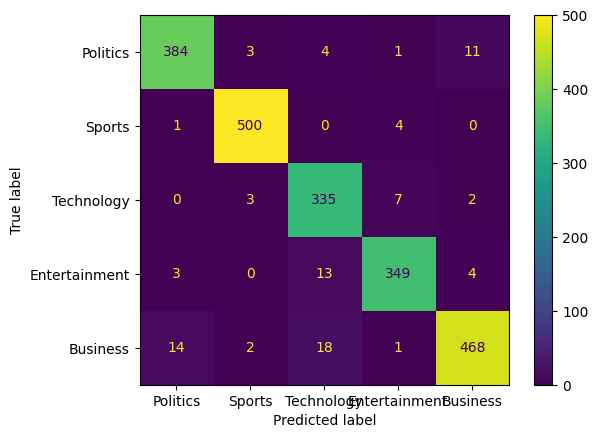

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clustered_data['Actual Category'].unique())
disp.plot();


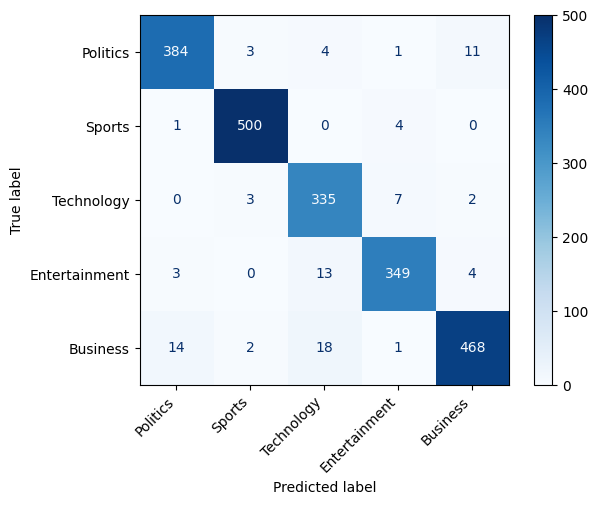

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clustered_data['Actual Category'].unique()
)
ax = disp.plot(cmap="Blues").ax_

# Rotate xtick labels by 45°
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


We were able to categorize the news articles with 96% accuracy

- Note that we were able to do so WITHOUT knowing the actual labels for the news articles.

### **Analyzing Incorrect Predictions**

Let's check a few cases where our model incorrectly categorized the news articles.

In [ ]:
# creating a dataframe of incorrect categorizations
incorrect_category_data = clustered_data[clustered_data['Actual Category'] != clustered_data['Category']].copy()
incorrect_category_data.shape

(91, 3)

In [ ]:
incorrect_category_data.head()

,Text,Category,Actual Category
24,"'Hitler' row over Welsh arts cash\n \n An artist critical of Welsh arts funding being brought under assembly government control has denied comparing the idea with dictatorships in Russia and Germany.\n \n Shani Rhys James is worried that the Arts Council of Wales may be taken over by the Welsh Assembly Government. Culture Minister Alun Pugh said it would be ""crass and ignorant"" to liken a quango review to Hitler's Germany. But Ms James emphasised she had actually said artists needed freedom. The future of the Arts Council of Wales has been in question since it was announced that most Welsh quangos would eventually be abolished.\n \n It was announced last July that three Welsh quangos, education and training body Elwa, the Wales Tourist Board and the Welsh Development Agency, would be brought under assembly government control. The Arts Council of Wales may be among the next to come under the assembly government's umbrella. But Ms James, who won the Â£30,000 Jerwood painting prize in 2003, said arts funding should be separate from government. Ms James told BBC Radio Wales: ""It's quite dangerous when you involve politicians because it's not like the health service and it's not like the railways. ""Free expression is absolutely vital in a democratic society. You need distance, you do not need government interference because it could be taken the wrong way.""\n \n But she said reports that she had likened the assembly government to totalitarian regimes were inaccurate.\n \n She told Good Morning Wales: ""Just to put the record straight, that business in the paper where it said I likened the government to Bolshevik Russia or Hitler's Germany, the actual quote I gave was: 'It is vital to a civilised society that we allow artists to express themselves without government control'. ""As we know from past European history, i.e. Russia and Germany in the early 20th Century, artists will go underground or leave the country or rather than compromise their expression'. ""Artists need a free voice to express themselves - they reflect a truth through their own art forms.'"" She said the assembly government was not best placed to run the arts in Wales.\n \n She added: ""It would be a momentous change and devastating to the arts. It would set the arts scene back 60 years, because I really don't think the government has the expertise. ""If you have the National Assembly taking control, I fear you are going to be going back to the dragons and leeks and the choirs.\n \n ""Wales has moved on. It is international now. It is not set back in How Green Was My Valley?"" Responding to Ms James' criticisms, Mr Pugh said: ""The structure of unelected quangos is under review and we have made it clear that further announcements are due shortly. ""Comparing the Welsh Assembly Government to Hitler's Germany is a crass and ignorant response to a real issue about democratic accountability."" Ms James, whose father was Welsh, was born in Melbourne where her parents worked in the theatre. She moved to Powys nearly 20 years ago where she works from her studio near Llangadfan. She has won a number of arts prizes including the Wales Open in 1989 and the Mostyn Open in 1991.\n",Entertainment,Politics
34,"Final hunts held as ban looms\n \n Hunts in England and Wales have begun on the last day that hunting with dogs is legal, with more due out later.\n \n Thousands of supporters are expected to turn out at more than 250 meets, many of which have altered their normal schedules to be out on a Thursday. The ban on hunting with dogs comes into effect from 0001 GMT on Friday. The Countryside Alliance had its latest legal bid to block the ban thwarted on Wednesday when the Appeal Court ruled the Hunting Act was lawful.\n \n But the group says hunting will continue in some form after the ban comes in, with hunts expected to test the new law to its limits. Others are expected to defy the ban by continuing to hunt illegally.\n \n Anti-hunt or

In [ ]:
embedding_matrix[24].reshape(1,-1)

array([[-3.89091782e-02,  3.27571593e-02,  1.84366596e-03,
        -5.83082717e-03,  6.01676181e-02,  3.99838760e-02,
         8.35594535e-02, -1.18345320e-01, -7.76455924e-02,
         4.64428067e-02, -2.95266658e-02, -5.02617098e-02,
         3.04022469e-02,  5.74795417e-02,  3.51721719e-02,
         7.98466727e-02, -3.60404402e-02, -7.27960616e-02,
        -4.79112677e-02,  2.51296163e-02,  5.57574444e-02,
         4.45612073e-02,  5.79392351e-02, -5.19735459e-03,
         6.96285740e-02, -6.41645044e-02, -1.78564992e-02,
         7.70377368e-03,  3.61743122e-02, -4.64323303e-03,
        -2.12844573e-02,  2.84408219e-02, -3.08642276e-02,
        -3.74556705e-02,  1.10003553e-01,  9.07791108e-02,
         5.40992357e-02, -1.71863772e-02, -6.01414628e-02,
        -3.79347317e-02, -1.19600758e-01,  9.33205802e-03,
        -8.53838101e-02, -4.68648002e-02,  2.57740617e-02,
         6.91595301e-03,  2.29997188e-02,  1.78320911e-02,
        -1.18079752e-01, -3.21984254e-02, -4.43797559e-0

In [ ]:
kmeans.cluster_centers_[[2]]

array([[-1.04431352e-02, -4.30865362e-02, -1.62626021e-02,
        -2.45876834e-02,  1.68980546e-02,  4.69357856e-02,
         4.19717319e-02,  8.88398476e-03,  1.32638179e-02,
        -1.04076304e-02, -2.22940296e-02, -1.37507236e-02,
         1.97701566e-02,  1.27870087e-02,  2.73736659e-03,
         7.39200087e-03,  4.07769158e-02, -2.11774111e-02,
        -1.97052993e-02,  6.95265830e-04, -2.27752887e-03,
        -3.76571342e-03,  5.05974377e-03, -4.74089663e-03,
        -8.69744271e-03, -2.58635692e-02, -2.06832830e-02,
        -4.78408160e-03, -3.27619500e-02, -3.24198697e-03,
         1.13380551e-02,  2.14789733e-02, -3.46702039e-02,
        -1.39540359e-02, -1.19951591e-02,  7.28391297e-03,
        -3.83114815e-03,  6.35841070e-03, -4.27267067e-02,
        -1.10604428e-02,  7.16870278e-03, -1.61167160e-02,
        -2.78127678e-02, -1.22194607e-02,  2.17279717e-02,
        -4.04962264e-02,  1.37342587e-02, -2.24780235e-02,
        -8.48783180e-03,  1.32654188e-02, -2.65153609e-0

In [ ]:
idx = 24

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[3]], "euclidean")[0,0])

Distance from Actual Category
0.9545187438410898
Distance from Predicted Category
1.0357046646132566


We see that the distance of the particular news article from the cluster centers of the actual and predicted categories is almost similar.

In [ ]:
idx = 45

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[4]], "euclidean")[0,0])

Distance from Actual Category
1.019115680375396
Distance from Predicted Category
1.0080197524127197


We see that the distance of the particular news article from the cluster centers of the actual and predicted categories is almost similar.

Based on this, we can say that a better approach of categorizing these news articles would be to assign more than one category to these news article.

### **Conclusion**

We did the following in the case study:

1. Encoded the dataset using the ***all-MiniLM-L6-v2*** transformer model to generate embeddings of 384 dimensions

2. Queried the dataset to find news articles similar to the query text we passed

3. Categorized the news articles using K-Means Clustering on the transformer encodings

4. Compared the predicted categories of the news articles to the actual categories

5. Analyzed the incorrect predictions to understand where the model went wrong

- Our model can correctly categorize 96% of the news articles.

- As mentioned, one can try tagging news articles with more than one category for better categorization.

    - One can find the cluster centers to which the news article is the closest and assign one or more categories accordingly

- Another approach that can be tried out would be fine-tuning the model to this particular data with category labels (one or more than one) to try and improve the overall performance.

- In addition, the startup can use other transformer models to generate summaries of the news articles, which can provide a gist of the news content.

<font size=5 color='blue'>Thanks!</font>
___